# Classification with PyTorch/TensorFlow

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

## Part 1: Iris Classification

Iris Dataset contains 150 records of 3 different classes of irises. Each record contains 4 numeric parameters: sepal length/width and petal length/width. It is an example of a simple dataset, for which you do not need a powerful neural network.

### Getting the Dataset

Iris dataset is build into Scikit Learn, so we can easily get it:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import numpy as np
iris = load_iris()
features = iris['data'].astype(np.float32)
labels = iris['target']
class_names = iris['target_names']
feature_names = iris['feature_names']

f_min = features.min(axis=0)
f_max = features.max(axis=0)
features = (features - f_min) / (f_max - f_min)
print(features.shape)
print(f"Features: {feature_names}, Classes: {class_names}")
print(labels)

(150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], Classes: ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Visualize the Data

In many cases, it makes sense to visualize the data to see if they look separable - it would assure us that we should be able to build good classification model. Because we have a few features, we can build a series of pairwise 2D scatter plots, showing different classes by different dot colors. This can be automatically done by a package called **seaborn**:

In [2]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(features,columns=feature_names).join(pd.DataFrame(labels,columns=['Label']))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


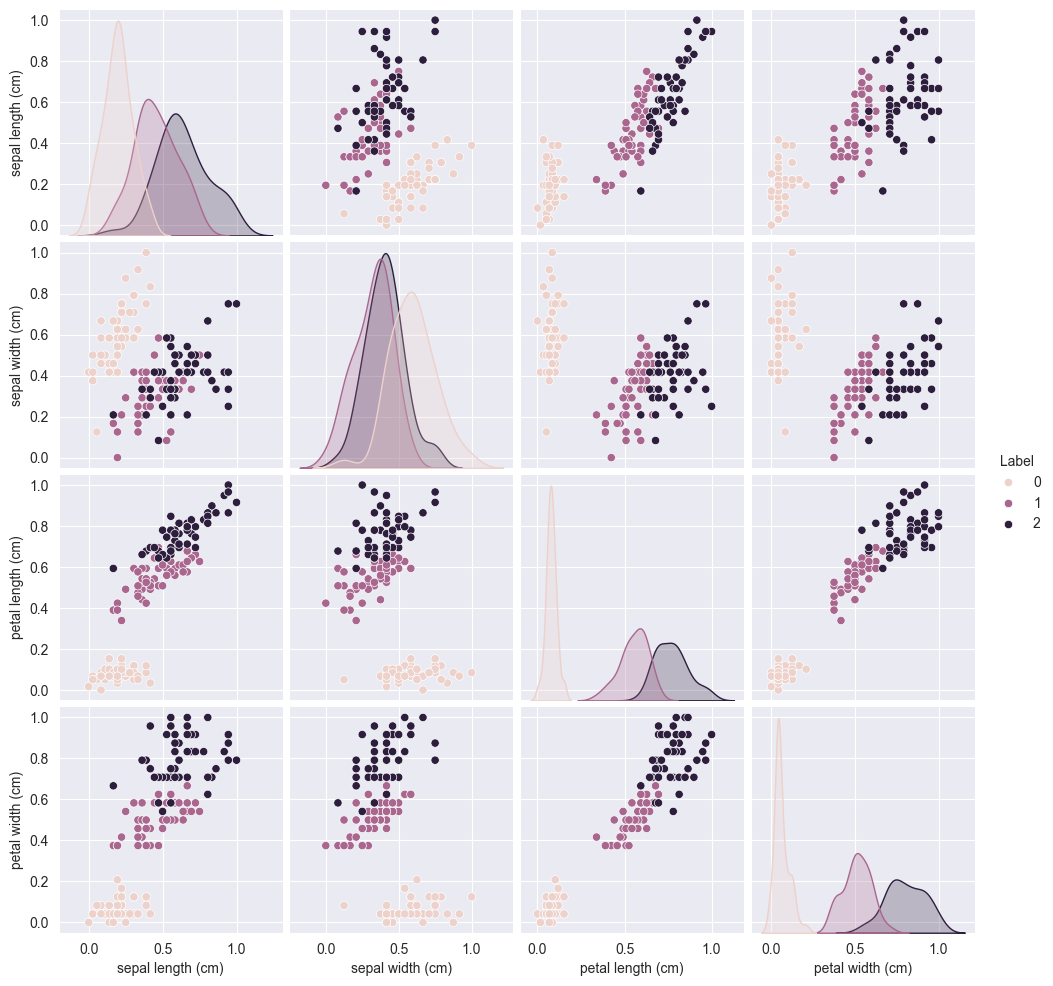

In [3]:
sns.pairplot(df,hue='Label')

### Normalize and Encode the Data

To prepare data to neural network training, we need to normalize inputs in the range [0..1]. This can be done either using plain `numpy` operations, or [Scikit Learn methods](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html).

Also, you need to decide if you want target label to be one-hot encoded or not. PyTorch and TensorFlow allow you feed in class number either as an integer (from 0 to N-1), or as one-hot encoded vector. When creating neural network structure, you need to specify loss function accordingly (eg. *sparse categorical crossentropy* for numeric representation, and *crossentropy loss* for one-hot encoding). One-hot encoding can also be [done using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), or by using this piece of code:

```python
n_values = np.max(labels) + 1
labels_onehot = np.eye(n_values)[labels]
``` 

In [4]:
# Code to normalize and encode the data

n_values = np.max(labels) + 1
labels_onehot = np.eye(n_values)[labels]

### Split the Data into Train and Test

Since we do not have separate train and test dataset, we need to split it intro train and test dataset [using Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,0.083333,0.666667,0.000000,0.041667,0
1,0.388889,1.000000,0.084746,0.125000,0
2,0.666667,0.458333,0.576271,0.541667,1
3,0.138889,0.583333,0.101695,0.041667,0
4,0.027778,0.500000,0.050847,0.041667,0
...,...,...,...,...,...
115,0.500000,0.333333,0.508475,0.500000,1
116,0.166667,0.208333,0.593220,0.666667,2
117,0.416667,0.833333,0.033898,0.041667,0
118,0.416667,0.250000,0.508475,0.458333,1


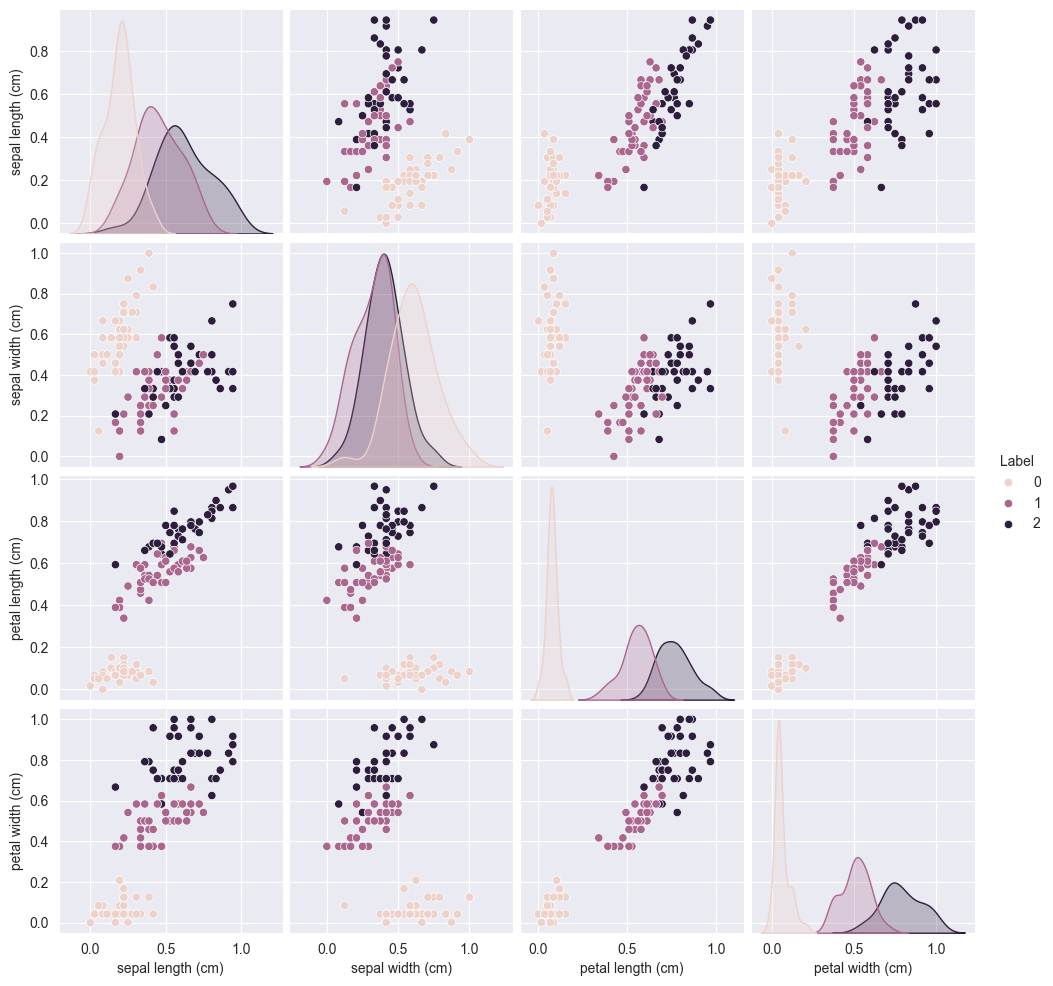

In [5]:
# Split the data
train_features, test_features = train_test_split(features, test_size=0.2 , random_state = 42)
df_train_labels , df_test_labels= train_test_split(labels,  test_size=0.2 , random_state = 42)
train_labels, test_labels = train_test_split(labels_onehot,  test_size=0.2 , random_state = 42)
dataset = torch.utils.data.TensorDataset(torch.tensor(train_features),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=4)
df1 = pd.DataFrame(train_features,columns=feature_names).join(pd.DataFrame(df_train_labels,columns=['Label']))

sns.pairplot(df1,hue='Label')
df1


### Define and Train Neural Network

Now you are ready to go, import your preferred framework, define the neural network and start training, observing the behavior of train and validation accuracy.

In [6]:
# Define the network
class Net(torch.nn.Module):
    def __init__(self , hidden_size = 10 , func = torch.nn.Sigmoid()):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(4,3),
            

        )
        
        
    def forward(self , x):
        return self.layers(x)



In [7]:
# Train the network
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
def accuracy_fn(output, target):
    y_pred = output.max(1, keepdim=True)[1]
    y_lab = target.argmax(1, keepdim=True)
    accuracy = accuracy_score(y_lab, y_pred)
    return  accuracy

def accuracy_net(net , data , label):
    y_pred = net(data)
    accuracy = accuracy_fn(label, y_pred)
    return accuracy

def train(model, dataloader, val_x, val_lab, epochs=10, lr=0.1):
    l,test_l,a,test_a = [],[],[],[]
    optim = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for (x , y) in dataloader:
            pred = model(x)
            preds = torch.softmax(pred,1)
            loss = loss_fn(preds,y)
            acc = accuracy_fn(preds,y)
            l.append(loss.item())
            # a.append(acc.item())
            optim.zero_grad()
            loss.backward()
            optim.step()
            
        model.eval()
        with torch.inference_mode():
            test_logits = model(val_x)
            test_preds = torch.softmax(test_logits,1)
            test_loss = loss_fn(test_logits,val_lab)
            test_acc = accuracy_fn(test_preds,val_lab)
            # test_l.append(test_loss.item())
            # test_a.append(test_acc.item())
        if epoch % 10 == 0:
            print(f'Epoch {epoch} test_loss {test_loss:.2f} test_accuracy {test_acc:.2f}')


net = Net(hidden_size=3)
train(net , dataloader , torch.tensor(train_features) , torch.tensor(train_labels) , epochs=200 )
test_predict = torch.softmax(net(torch.tensor(features)) , 1)
test_predict_index = test_predict.argmax(1)
acc_test = accuracy_fn(test_predict ,torch.tensor(labels_onehot))
print(acc_test)

Epoch 0 test_loss 0.56 test_accuracy 0.66
Epoch 10 test_loss 0.19 test_accuracy 0.96
Epoch 20 test_loss 0.13 test_accuracy 0.97
Epoch 30 test_loss 0.10 test_accuracy 0.97
Epoch 40 test_loss 0.09 test_accuracy 0.97
Epoch 50 test_loss 0.08 test_accuracy 0.97
Epoch 60 test_loss 0.07 test_accuracy 0.97
Epoch 70 test_loss 0.07 test_accuracy 0.97
Epoch 80 test_loss 0.07 test_accuracy 0.97
Epoch 90 test_loss 0.06 test_accuracy 0.97
Epoch 100 test_loss 0.06 test_accuracy 0.97
Epoch 110 test_loss 0.06 test_accuracy 0.97
Epoch 120 test_loss 0.06 test_accuracy 0.97
Epoch 130 test_loss 0.06 test_accuracy 0.97
Epoch 140 test_loss 0.06 test_accuracy 0.97
Epoch 150 test_loss 0.05 test_accuracy 0.97
Epoch 160 test_loss 0.05 test_accuracy 0.97
Epoch 170 test_loss 0.05 test_accuracy 0.97
Epoch 180 test_loss 0.05 test_accuracy 0.97
Epoch 190 test_loss 0.05 test_accuracy 0.97
0.9733333333333334


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

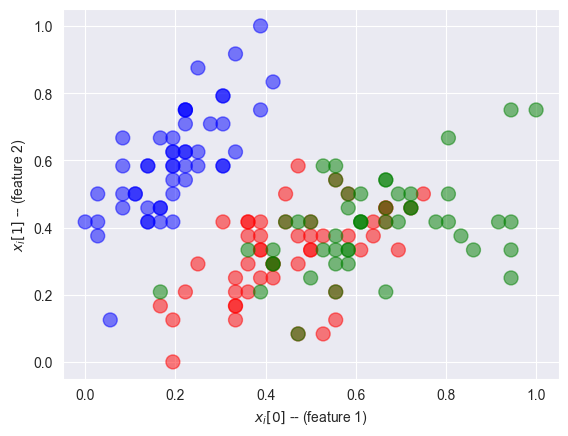

In [8]:
# Visualize train/validation accuracy graph
import matplotlib.pyplot as plt

def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['g' if l == 2 else ('r' if l == 1 else 'b') for l in labels]
    # colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha = 0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,1])
        min_y = min(features[:,1])*(1-.1)
        max_y = max(features[:,1])*(1+.1)
        cx = np.array([min_x,max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

plot_dataset(features,labels,W=train_features,b=train_labels)

### Experiment

Now you can experiment with different network architectures to see how it affects the result. Try:
1. One-layer network with 3 neurons (equal to the number of classes)
1. Two-layer network with small/medium/large hidden layer
1. Using more layers

Make sure you observe overfitting when you are using rich model with lots of neurons (parameters).

In [ ]:
# Experiment
class OneLayerNet(torch.nn.Module):
    def __init__(self , input , output):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input,output),   
        )
    
    def forward(self , x):
        return self.layers(x)
    
class TwoLayerNet(torch.nn.Module):
    def __init__(self , input ,output ,  hidden_size = 10 ):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input,hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output),
        )
    
    def forward(self , x):
        return self.layers(x)
    
class MoreLayerNet(torch.nn.Module):
    def __init__(self , input ,output ,  hidden_size1 = 10 , hidden_size2 = 10 , hidden_size = 10 ):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input,hidden_size1),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size1,hidden_size2),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size2,hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output),
        )
    def forward(self , x):
        return self.layers(x)
    
    
    
oneLayer = OneLayerNet(4 ,3)
twoLayer = TwoLayerNet(4 ,3)
moreLayer = MoreLayerNet(4 ,3 , 10 , 10 , 10)

# train(oneLayer , dataloader , torch.tensor(train_features) , torch.tensor(train_labels) , epochs=100)
# 
# accuracy_one = accuracy_net(oneLayer , torch.tensor(test_features) , torch.tensor(test_labels))
# print("one layer acc = {}".format(accuracy_one))
# 
# train(twoLayer , dataloader , torch.tensor(train_features) , torch.tensor(train_labels) , epochs=100)
# 
# accuracy_two = accuracy_net(twoLayer , torch.tensor(test_features) , torch.tensor(test_labels))
# print("two layer acc = {}".format(accuracy_two))

train(moreLayer , dataloader , torch.tensor(train_features) , torch.tensor(train_labels) , epochs=300)

accuracy_more = accuracy_net(moreLayer , torch.tensor(test_features) , torch.tensor(test_labels))
print("more layer acc = {}".format(accuracy_more))


## Part 2: MNIST Training

Both Keras and PyTorch contain MNIST as built-in dataset, so you can easily get it with a couple of lines of code ([Keras](https://keras.io/api/datasets/mnist/), [PyTorch](https://pytorch.org/vision/stable/datasets.html)). You will also be able to load both train and test datasets without manually splitting them.

In [19]:
# Load the dataset
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
def accuracy_fn(output, target):
    y_pred = output.max(1, keepdim=True)[1]
    y_lab = target.argmax(1, keepdim=True)
    accuracy = accuracy_score(y_lab, y_pred)
    return  accuracy

def accuracy_net(net , data , label):
    y_pred = net(data)
    accuracy = accuracy_fn(label, y_pred)
    return accuracy

def accuracy_loader(net , loader):
    acc = 0
    cnt = 0
    for(x , y ) in loader:
        images = x.view(-1, 28*28)  # 或者使用 images.flatten(1)
        one_hot = torch.nn.functional.one_hot(y,10).float()
        pred_log = net(images)
        pred = torch.softmax(pred_log,1)
        acc += accuracy_fn(pred , one_hot)
        cnt += 1
    return acc/cnt

transform = transforms.Compose([
    transforms.ToTensor(),          # 将PIL Image或numpy.ndarray转换为tensor
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST数据集的平均值和标准差
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MNISTNet(torch.nn.Module):
    def __init__(self , input , output , hidden_size = 10 ):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output),
        )
        
    def forward(self , x):
        return self.layers(x)


def trainMnist(net , dataloader , lr=0.1 , epochs=200):
    optim = torch.optim.SGD(net.parameters(), lr=lr)
    loss_fn = torch.nn.CrossEntropyLoss()
    for ep in range(epochs):
        for (x , y) in dataloader:
            images = x.view(-1, 28*28)  # 或者使用 images.flatten(1)
            one_hot = torch.nn.functional.one_hot(y,10).float()
            pred_log = net(images)
            pred = torch.softmax(pred_log,1)
            loss = loss_fn(pred,one_hot)
            acc = accuracy_fn(pred , one_hot)
            optim.zero_grad()
            loss.backward()
            optim.step()
        
        # if ep%10 == 0:
        print(f'Epoch {ep} test_loss {loss:.2f} test_accuracy {acc:.2f}')

mnist_net = MNISTNet(784 ,10 , 20)
trainMnist(mnist_net , train_loader )
test_acc = accuracy_loader(mnist_net , test_loader)
print("test acc = {}".format(test_acc))


Epoch 0 test_loss 1.48 test_accuracy 1.00
Epoch 1 test_loss 1.59 test_accuracy 0.88
Epoch 2 test_loss 1.67 test_accuracy 0.75
Epoch 3 test_loss 1.59 test_accuracy 0.88
Epoch 4 test_loss 1.58 test_accuracy 0.88
Epoch 5 test_loss 1.46 test_accuracy 1.00
Epoch 6 test_loss 1.59 test_accuracy 0.88
Epoch 7 test_loss 1.46 test_accuracy 1.00
Epoch 8 test_loss 1.84 test_accuracy 0.62
Epoch 9 test_loss 1.71 test_accuracy 0.75
Epoch 10 test_loss 1.46 test_accuracy 1.00
Epoch 11 test_loss 1.46 test_accuracy 1.00
Epoch 12 test_loss 1.46 test_accuracy 1.00
Epoch 13 test_loss 1.59 test_accuracy 0.88
Epoch 14 test_loss 1.46 test_accuracy 1.00
Epoch 15 test_loss 1.59 test_accuracy 0.88
Epoch 16 test_loss 1.46 test_accuracy 1.00
Epoch 17 test_loss 1.59 test_accuracy 0.88
Epoch 18 test_loss 1.46 test_accuracy 1.00
Epoch 19 test_loss 1.71 test_accuracy 0.75
Epoch 20 test_loss 1.71 test_accuracy 0.75
Epoch 21 test_loss 1.46 test_accuracy 1.00
Epoch 22 test_loss 1.71 test_accuracy 0.75
Epoch 23 test_loss 1.

Now you need to perform the steps above to make sure dataset is normalized (it would probably already be), defining and training a neural network.

## Takeaway

1. Neural networks can be used for traditional machine learning tasks. However, they are in many cases too powerful, and can cause overfitting.
1. It is important in this assignment that you observe the overfitting behavior, and try to avoid it.
1. With frameworks like Keras, sometimes training a neural network is quite straightforward. But you need to understand what goes on.